<a href="https://colab.research.google.com/github/Sanil2108/machine-learning-and-computer-vision/blob/master/SelfDrivingCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install imgaug

In [2]:
# import statements
# general
import numpy as np
import pandas as pd
import random
import cv2
import os
import ntpath
from imgaug import augmenters as iaa

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# scikit
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import Adam


Using TensorFlow backend.


In [3]:
!git clone https://github.com/Sanil2108/Track1_selfdrivingcardata

fatal: destination path 'Track1_selfdrivingcardata' already exists and is not an empty directory.


In [4]:
!ls

sample_data  Track1_selfdrivingcardata


In [0]:
!cd Track1_selfdrivingcardata/

In [6]:
data_dir = 'Track1_selfdrivingcardata'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
new_path = os.path.join(data_dir, 'driving_log.csv')
data = pd.read_csv(new_path, names=columns)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,/home/sanil/Documents/self-driving3/IMG/center...,/home/sanil/Documents/self-driving3/IMG/left_...,/home/sanil/Documents/self-driving3/IMG/right...,0.0,0.0,0.0,0.000079
1,/home/sanil/Documents/self-driving3/IMG/center...,/home/sanil/Documents/self-driving3/IMG/left_...,/home/sanil/Documents/self-driving3/IMG/right...,0.0,0.0,0.0,0.000079
2,/home/sanil/Documents/self-driving3/IMG/center...,/home/sanil/Documents/self-driving3/IMG/left_...,/home/sanil/Documents/self-driving3/IMG/right...,0.0,0.0,0.0,0.000081
3,/home/sanil/Documents/self-driving3/IMG/center...,/home/sanil/Documents/self-driving3/IMG/left_...,/home/sanil/Documents/self-driving3/IMG/right...,0.0,0.0,0.0,0.000078
4,/home/sanil/Documents/self-driving3/IMG/center...,/home/sanil/Documents/self-driving3/IMG/left_...,/home/sanil/Documents/self-driving3/IMG/right...,0.0,0.0,0.0,0.000078


In [7]:
ntpath.split(data['center'][0])

('/home/sanil/Documents/self-driving3/IMG',
 'center_2018_12_19_16_48_40_717.jpg')

In [0]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center']=data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)

In [9]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_12_19_16_48_40_717.jpg,left_2018_12_19_16_48_40_717.jpg,right_2018_12_19_16_48_40_717.jpg,0.0,0.0,0.0,0.000079
1,center_2018_12_19_16_48_40_822.jpg,left_2018_12_19_16_48_40_822.jpg,right_2018_12_19_16_48_40_822.jpg,0.0,0.0,0.0,0.000079
2,center_2018_12_19_16_48_40_926.jpg,left_2018_12_19_16_48_40_926.jpg,right_2018_12_19_16_48_40_926.jpg,0.0,0.0,0.0,0.000081
3,center_2018_12_19_16_48_41_030.jpg,left_2018_12_19_16_48_41_030.jpg,right_2018_12_19_16_48_41_030.jpg,0.0,0.0,0.0,0.000078
4,center_2018_12_19_16_48_41_136.jpg,left_2018_12_19_16_48_41_136.jpg,right_2018_12_19_16_48_41_136.jpg,0.0,0.0,0.0,0.000078


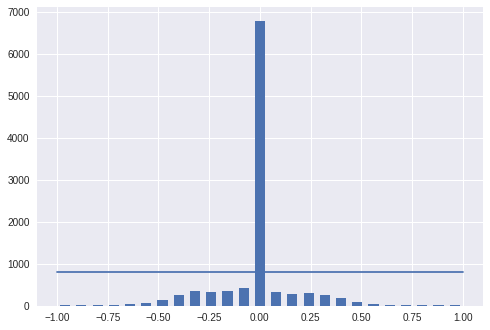

In [10]:
num_bins = 25
max_samples = 800
hist, bins = np.histogram(data['steering'],num_bins)
center = (bins[:-1] + bins[1:])/2
plt.bar(center, hist, width=0.05)
plt.plot(
    (min(data['steering']), max(data['steering'])), 
    (max_samples, max_samples)
)
plt.show()

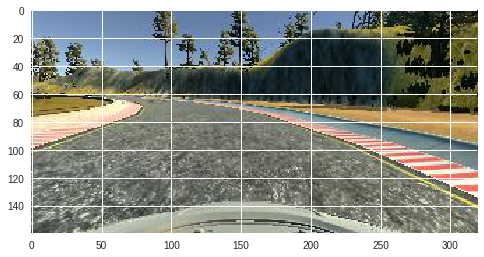

In [11]:
plt.imshow(mpimg.imread(os.path.join(data_dir+'/IMG', data['center'][0])))

In [0]:
# Removing the unnecessary data
bins_count = [0]*num_bins
removed = []
data_steering_shuffled = shuffle([i for i in range(len(data['steering']))])
for i in range(len(data_steering_shuffled)):
  current_index = data_steering_shuffled[i]
  for j in range(num_bins):
    if data['steering'][current_index]<=bins[j+1] and data['steering'][current_index]>=bins[j]:
      if bins_count[j] >= max_samples:
        removed.append(current_index)
      else:
        bins_count[j] += 1
      break

In [0]:
data.drop(removed, inplace=True)

In [14]:
data['steering']

5        0.000000
22      -0.089639
23      -0.395241
24      -0.702198
25      -0.675018
26      -0.302563
30      -0.206403
31      -0.511011
32      -0.361599
36      -0.095196
37      -0.424080
38      -0.347061
44      -0.329991
48      -0.147333
49      -0.438423
50      -0.504647
51      -0.171920
53      -0.334572
56       0.000000
59      -0.247620
60      -0.129507
63       0.000000
66      -0.318012
67      -0.623807
68      -0.930852
69      -0.822868
70      -0.484711
71      -0.180517
73       0.152466
74       0.471954
           ...   
10364    0.128189
10371    0.000000
10375    0.358051
10379    0.211452
10380    0.552372
10381    0.212979
10394    0.121002
10397    0.000000
10398    0.096630
10399    0.402864
10400    0.522348
10401    0.128229
10403   -0.190281
10404   -0.209574
10409    0.000000
10411    0.000000
10417    0.190073
10419    0.000000
10424    0.000000
10425    0.143339
10429    0.077451
10430    0.397691
10431    0.077366
10436    0.311742
10447    0

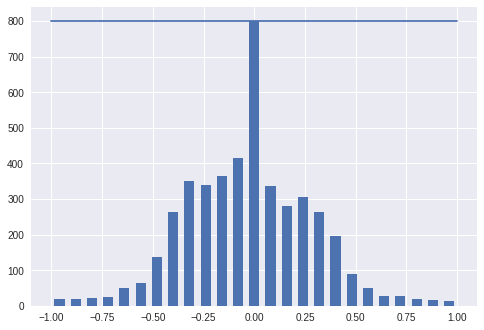

In [15]:
num_bins = 25
max_samples = 800
hist, bins = np.histogram(data['steering'],num_bins)
center = (bins[:-1] + bins[1:])/2
plt.bar(center, hist, width=0.05)
plt.plot(
    (min(data['steering']), max(data['steering'])), 
    (max_samples, max_samples)
)
plt.show()

In [0]:
def load_images_steerings(data_dir, df):
  steerings = []
  image_paths = []
  for i in range(len(df)):
    indexed_data = df.iloc()[i]
    
    steering, center, left, right = indexed_data['steering'], indexed_data['center'], indexed_data['left'], indexed_data['right']
    
    image_paths.append(os.path.join(data_dir, center.strip()))
    steerings.append(float(indexed_data['steering']))
    image_paths.append(os.path.join(data_dir, left.strip()))
    steerings.append(float(indexed_data['steering'])+0.15)
    image_paths.append(os.path.join(data_dir, right.strip()))
    steerings.append(float(indexed_data['steering'])-0.15)
    
  image_paths = np.asarray(image_paths)
  steerings = np.asarray(steerings)
  
  return image_paths, steerings

In [0]:
image_paths, steerings = load_images_steerings(data_dir+'/IMG', data)

In [49]:
print(len(image_paths))
print(len(steerings))
print(len(data))

print(steerings)

13467
13467
4489
[ 0.    0.15 -0.15 ...  0.    0.15 -0.15]


In [78]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 10773
Valid Samples: 2694


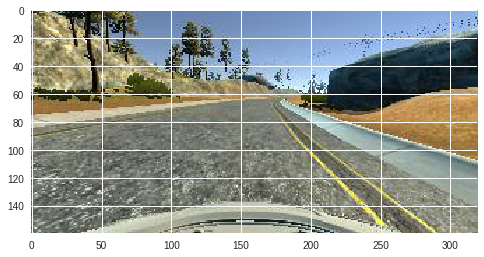

In [51]:
im = mpimg.imread(X_train[3])
plt.imshow(im)

In [0]:
def img_preprocess(img):
  img = img[60:135, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3, 3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  
  return img

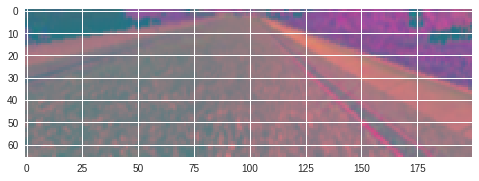

In [53]:
image = img_preprocess(mpimg.imread(X_train[0]))
plt.imshow(image)

In [0]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
# # axes[0].set_title('training set')

# # axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
# # axes[1].set_title('validation set')

# plt.show()

In [0]:
# Image augmentation functions
def zoom(img):
  zoom = iaa.Affine(scale=(1, 1.3))
  return zoom.augment_image(img)

def pan(img):
  pan = iaa.Affine(translate_percent = {"x":(-0.1, 0.1), "y":(-0.1, 0.1)})
  return pan.augment_image(img)

def brightness(img):
  brightness = iaa.Multiply((0.2, 1.2))
  img = brightness.augment_image(img)
  return img

def img_random_flip(img, steering_angle):
  img = cv2.flip(img, 1)
  steering_angle = -steering_angle
  return img, steering_angle

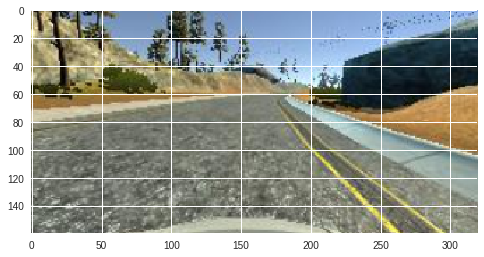

In [56]:
plt.imshow(zoom(im))

In [0]:
def random_augment(img, steering_angle):
  image = mpimg.imread(img)
  if np.random.rand()<0.5:
    image = zoom(image)
  if np.random.rand()<0.5:
    image = pan(image)
  if np.random.rand()<0.5:
    image = brightness(image)
  if np.random.rand()<0.5:
    image, steering_angle = img_random_flip(image, steering_angle)
    
  return image, steering_angle

In [0]:
def batch_generator(image_paths, steering_angles, batch_size, istraining):
  while(True):
    batch_img = []
    batch_steerings_list = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_angles[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_angles[random_index]
        
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steerings_list.append(steering)
      
    yield (np.asarray(batch_img), np.asarray(batch_steerings_list))

10


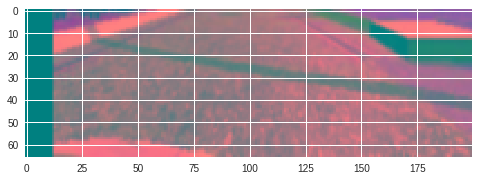

In [79]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 10, 1))
print(len(x_train_gen))
plt.imshow(x_train_gen[0])

In [80]:
image_paths

array(['Track1_selfdrivingcardata/IMG/center_2018_12_19_16_48_41_241.jpg',
       'Track1_selfdrivingcardata/IMG/left_2018_12_19_16_48_41_241.jpg',
       'Track1_selfdrivingcardata/IMG/right_2018_12_19_16_48_41_241.jpg',
       ...,
       'Track1_selfdrivingcardata/IMG/center_2018_12_19_17_14_33_838.jpg',
       'Track1_selfdrivingcardata/IMG/left_2018_12_19_17_14_33_838.jpg',
       'Track1_selfdrivingcardata/IMG/right_2018_12_19_17_14_33_838.jpg'],
      dtype='<U64')

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
#   model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
#   model.add(Dropout(0.5))
  model.add(Dense(50, activation='elu'))
#   model.add(Dropout(0.5))
  model.add(Dense(10, activation='elu'))
#   model.add(Dropout(0.5))
  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  
  return model
  

In [82]:
model = nvidia_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               115300    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), act

In [83]:
history = model.fit_generator(
    batch_generator(X_train, y_train, 100, 1), 
    steps_per_epoch=300, 
    epochs=10, 
    validation_data=batch_generator(X_valid, y_valid, 100, 0), 
    validation_steps=200,  
    verbose=1, 
    shuffle=1)

Epoch 1/10
300/300 [==============================] - 187s 622ms/step - loss: 0.0851 - val_loss: 0.0765
Epoch 2/10
300/300 [==============================] - 179s 596ms/step - loss: 0.0743 - val_loss: 0.0704
Epoch 3/10
300/300 [==============================] - 179s 595ms/step - loss: 0.0724 - val_loss: 0.0662
Epoch 4/10
300/300 [==============================] - 178s 594ms/step - loss: 0.0689 - val_loss: 0.0634
Epoch 5/10
300/300 [==============================] - 179s 595ms/step - loss: 0.0667 - val_loss: 0.0620
Epoch 6/10
300/300 [==============================] - 180s 601ms/step - loss: 0.0649 - val_loss: 0.0636
Epoch 7/10
300/300 [==============================] - 179s 598ms/step - loss: 0.0654 - val_loss: 0.0634
Epoch 8/10
300/300 [==============================] - 178s 595ms/step - loss: 0.0636 - val_loss: 0.0602
Epoch 9/10
300/300 [==============================] - 180s 600ms/step - loss: 0.0624 - val_loss: 0.0599
Epoch 10/10
300/300 [==============================] - 180s 599m

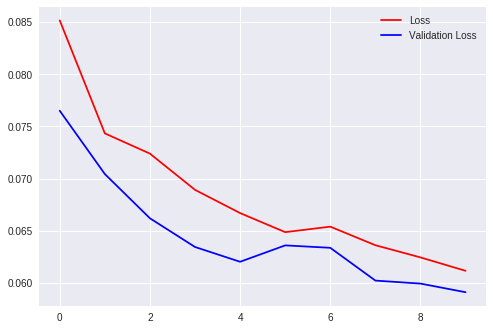

In [87]:
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'b')
plt.legend(['Loss', 'Validation Loss'])
plt.show()

In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')